In [12]:
from helpers import *

In [13]:
df = pd.read_csv("full_data_undersample.csv").drop(columns=["customer_unique_id", "last_order_date"], axis=1)

print(df.columns)
print(df.shape)
df.head()

Index(['avg_delivery_delay', 'items_nb', 'avg_satisfaction', 'cat_Auto',
       'cat_Books', 'cat_Electronics & Appliances', 'cat_Fashion',
       'cat_Food and Drinks', 'cat_Health and Beauty', 'cat_Home & Furniture',
       'cat_Miscellaneous', 'cat_Music', 'cat_Pets', 'cat_Sports', 'cat_Tools',
       'cat_Toys & Baby', 'recency_score', 'frequency_score', 'monetary_score',
       'rfm_score'],
      dtype='object')
(5994, 20)


,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2,112
1,10.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,2,312
2,27.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5,415
3,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,3,513
4,20.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2,412


In [14]:
pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df)  

tsne = TSNE(random_state=42)
df_tsne = tsne.fit_transform(df)
df_tsne_pca = tsne.fit_transform(df_pca)

In [15]:
# KMEANS
n_clusters = np.arange(3, 16, 1)  
algorithms = ["lloyd", "elkan"]
scores_df_kmeans = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])

inertias_pca = []  
inertias_tsne = []  
inertias_tsne_pca = []  

for n_cluster in n_clusters: 
    for algo in algorithms: 
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, kmeans_pca) = calculate_score_kmeans(df_pca, n_cluster, algo)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, kmeans_tsne_pca) = calculate_score_kmeans(df_tsne_pca, n_cluster, algo)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, kmeans_tsne) = calculate_score_kmeans(df_tsne, n_cluster, algo)
        
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"kmeans-pca-{algo}"}])])
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"kmeans-tsne-pca-{algo}"}])])
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"kmeans-tsne-{algo}"}])])
        
        inertias_pca.append((n_cluster, algo, kmeans_pca.inertia_))  
        inertias_tsne.append((n_cluster, algo, kmeans_tsne.inertia_))  
        inertias_tsne_pca.append((n_cluster, algo, kmeans_tsne_pca.inertia_))  


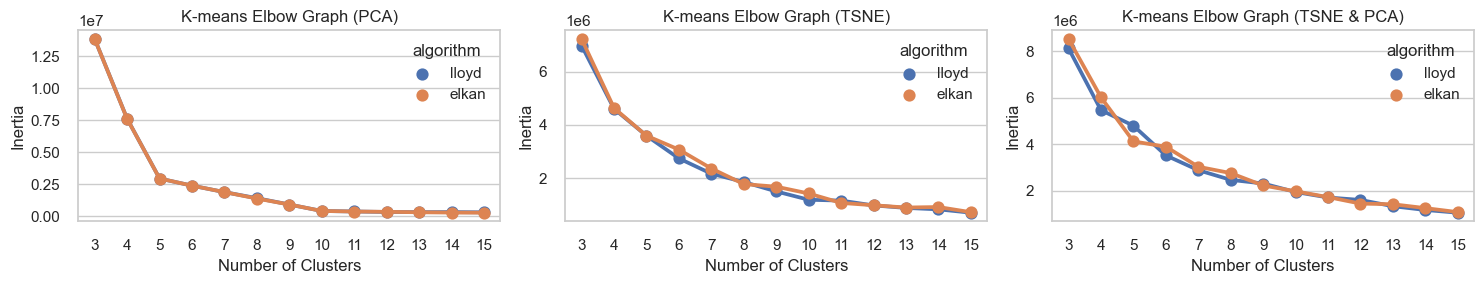

In [16]:
# Create the figure and axis objects  
fig, axs = plt.subplots(1, 3, figsize=(15, 3))  
  
# Plotting the elbow graph (PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[0])  
axs[0].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (PCA)')  
  
# Plotting the elbow graph (TSNE)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[1])  
axs[1].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE)')  
  
# Plotting the elbow graph (TSNE & PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[2])  
axs[2].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE & PCA)')  
  
# Adjust the spacing between plots  
plt.tight_layout()  
  
# Show the plots  
plt.show()  

In [17]:
# AGGLOMERATIVE  
n_clusters = np.arange(3, 16, 1)  
linkages = ["ward", "complete", "average", "single"]  
scores_df_agglomerative = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

for n_cluster in n_clusters:  
    for linkage in linkages:  
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_agglomerative(df_pca, n_cluster, linkage)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_agglomerative(df_tsne_pca, n_cluster, linkage)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_agglomerative(df_tsne, n_cluster, linkage)
          
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"agglo-pca-{linkage}"}])])
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"agglo-tse-pca-{linkage}"}])])
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"agglo-tse-{linkage}"}])])
  

In [18]:
# "gaussian_mixture": {  
#     "n_components": n_clusters,  
#     "covariance_type": ["full", "tied", "diag", "spherical"]  
# },
# GAUSSIAN MIXTURE
n_components = np.arange(3, 16, 1)  
covariance_type = ["full", "tied", "diag", "spherical"]
scores_df_gaussian = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  
for n_component in n_components: 
    for covariance in covariance_type: 
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_gaussian_mixture(df_pca, n_component, covariance)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_gaussian_mixture(df_tsne_pca, n_component, covariance)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_gaussian_mixture(df_tsne, n_component, covariance)
        
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"gaussian-pca-{covariance}"}])])
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"gaussian-tse-pca-{covariance}"}])])
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"gaussian-tse-{covariance}"}])])

In [19]:
# eps = np.arange(0.5, 10, 0.5)  
# min_samples = np.arange(5, 20, 5)
eps = np.arange(0.5, 5.5, 1)  
min_samples = [10]
scores_df_dbscan = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

for eps_param in eps: 
    for min_samples_param in min_samples: 
            (n1, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan1) = calculate_score_dbscan(df_pca, eps=eps_param, min_samples=min_samples_param)
            (n2, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan2) = calculate_score_dbscan(df_tsne_pca, eps=eps_param, min_samples=min_samples_param)
            (n3, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan3) = calculate_score_dbscan(df_tsne, eps=eps_param, min_samples=min_samples_param)

            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n1,'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1,  'type': f"dbscan-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n2,'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2,  'type': f"dbscan-tse-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n3,'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3,  'type': f"dbscan-tse-{eps_param}-{min_samples_param}"}])])


kmeans
Best silhouette = kmeans-pca-lloyd (0.8104607038543997)
Best calinski_harabasz = kmeans-pca-lloyd (192891.09482820876)
Best min_davies_bouldin = kmeans-pca-lloyd (0.28413307258345544)


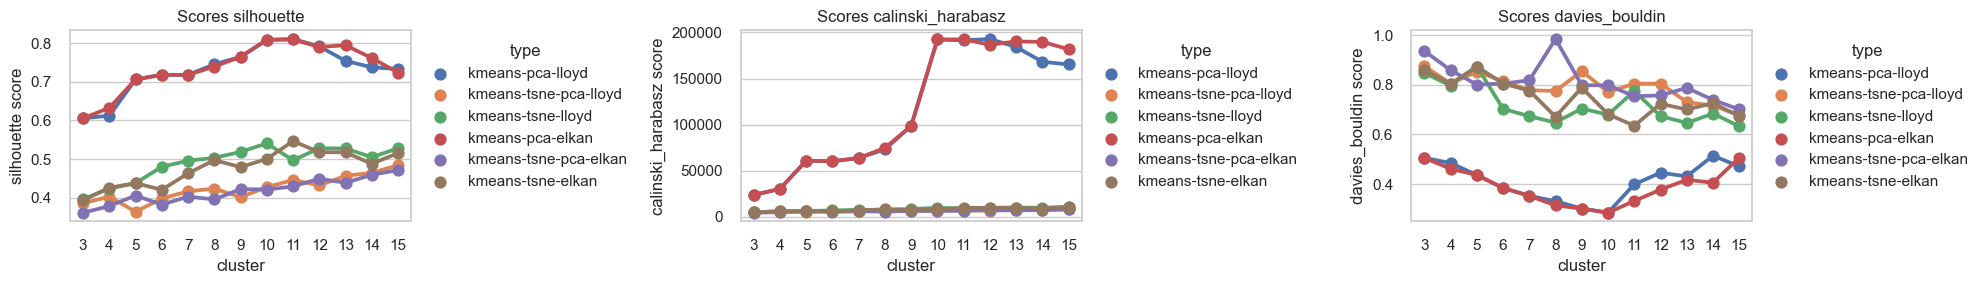

DBSCAN
Best silhouette = dbscan-pca-3.5-10 (0.542473316192627)
Best calinski_harabasz = dbscan-pca-3.5-10 (9527.05228041128)
Best min_davies_bouldin = dbscan-tse-0.5-10 (0.6415643743237679)


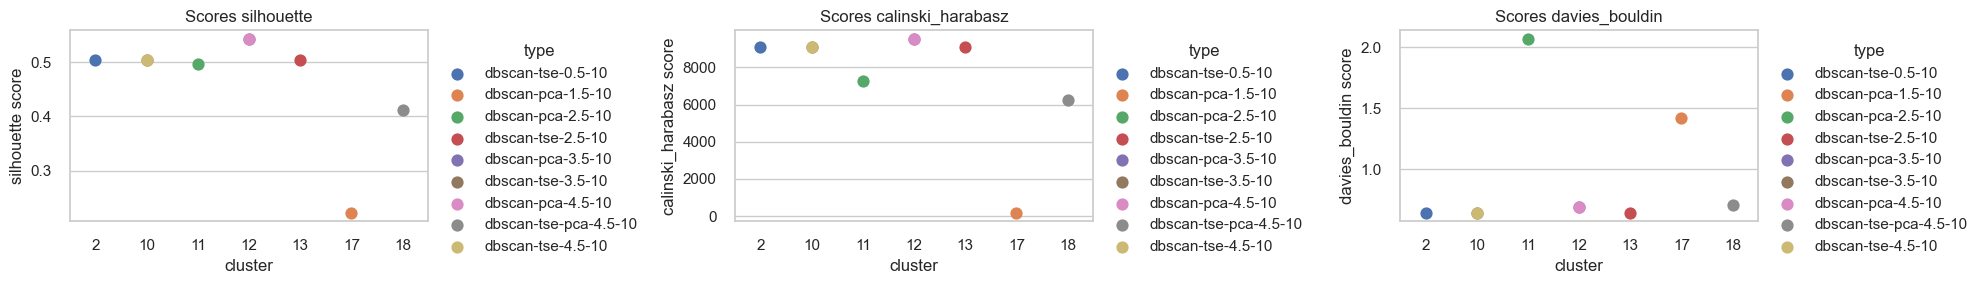

AgglomerativeClustering
Best silhouette = agglo-pca-ward (0.809325784781273)
Best calinski_harabasz = agglo-pca-ward (194641.30106881275)
Best min_davies_bouldin = agglo-pca-single (0.22128978682786435)


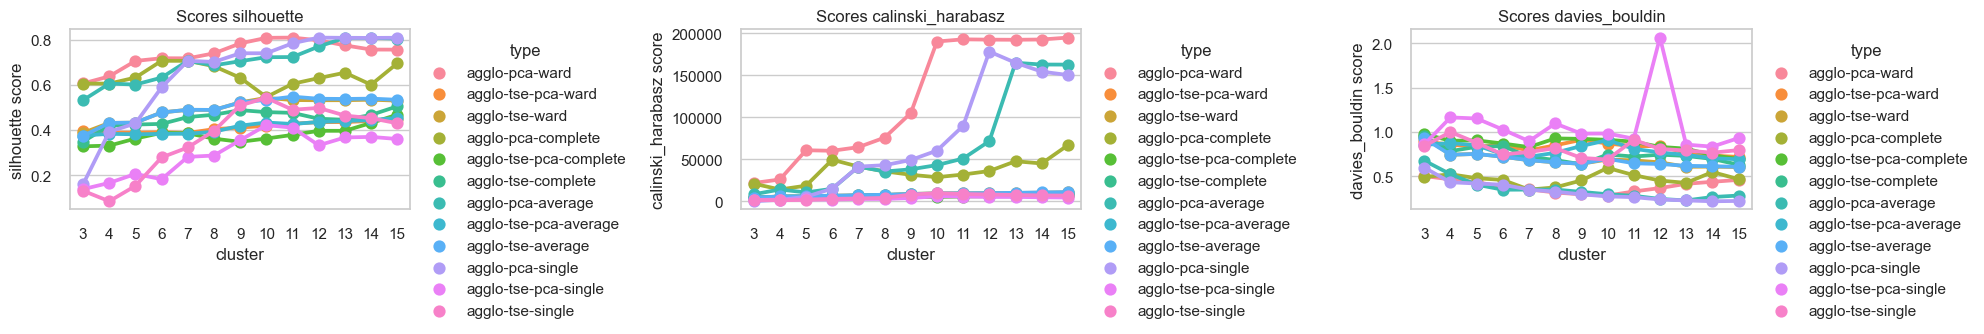

GaussianMixture
Best silhouette = gaussian-pca-full (0.8082375278681196)
Best calinski_harabasz = gaussian-pca-diag (192635.31580120538)
Best min_davies_bouldin = gaussian-pca-tied (0.28413307258345544)


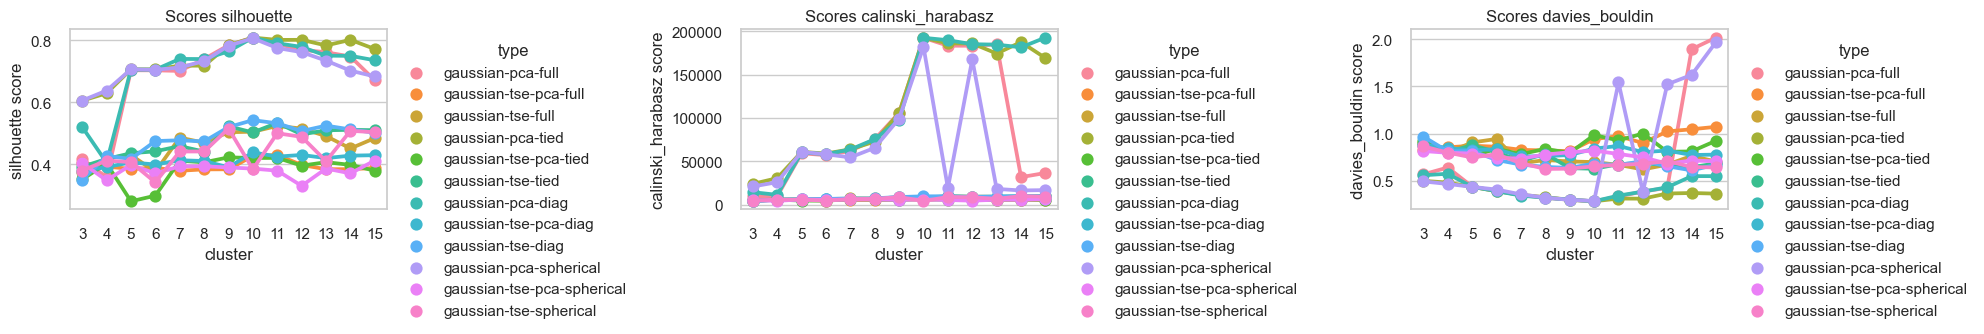

In [20]:
sns.set(style="whitegrid")    
# for title, df_score in [["kmeans", scores_df_kmeans], ["AgglomerativeClustering",scores_df_agglomerative], ["GaussianMixture",scores_df_gaussian]]:
for title, df_score in [["kmeans", scores_df_kmeans], ["DBSCAN", scores_df_dbscan],["AgglomerativeClustering",scores_df_agglomerative], ["GaussianMixture",scores_df_gaussian]]:
    
    print(title)
    
    df_score = df_score[(df_score["n_cluster"] < 20) & (df_score["n_cluster"] > 1)]
    plt.figure(figsize=(20, 3))  
    ax1 = plt.subplot(1, 3, 1)  
    sns.pointplot(data=df_score, x='n_cluster', y='silhouette', hue="type")    
    plt.title('Scores silhouette')  
    plt.xlabel('cluster')    
    plt.ylabel('silhouette score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    ax2 = plt.subplot(1, 3, 2)  
    sns.pointplot(data=df_score, x='n_cluster', y='calinski_harabasz', hue="type")    
    plt.title('Scores calinski_harabasz')  
    plt.xlabel('cluster')    
    plt.ylabel('calinski_harabasz score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    ax3 = plt.subplot(1, 3, 3)  
    sns.pointplot(data=df_score, x='n_cluster', y='davies_bouldin', hue="type")    
    plt.title('Scores davies_bouldin')  
    plt.xlabel('cluster')    
    plt.ylabel('davies_bouldin score')    
    plt.legend(title='type', bbox_to_anchor=(1, 1))    
    
    min_silhouette = df_score[df_score['silhouette'] == df_score['silhouette'].max()]
    min_calinski_harabasz = df_score[df_score['calinski_harabasz'] == df_score['calinski_harabasz'].max()]
    min_davies_bouldin = df_score[df_score['davies_bouldin'] == df_score['davies_bouldin'].min()]
    
    print(f"Best silhouette = {min_silhouette['type'].values[0]} ({min_silhouette['silhouette'].values[0]})")  
    print(f"Best calinski_harabasz = {min_calinski_harabasz['type'].values[0]} ({min_calinski_harabasz['calinski_harabasz'].values[0]})")  
    print(f"Best min_davies_bouldin = {min_davies_bouldin['type'].values[0]} ({min_davies_bouldin['davies_bouldin'].values[0]})")  
    
    
    plt.tight_layout()  
    plt.show()

0.8082375278681196


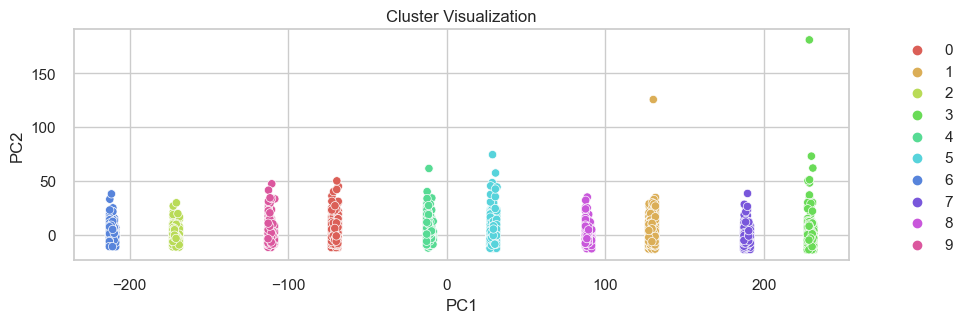

In [21]:
  # Fit Kmeans model  
kmeans = KMeans(n_clusters=10, n_init="auto")  
kmeans.fit(df_pca) 

# Predict cluster labels  
labels = kmeans.predict(df_pca)  

print(silhouette_score(df_pca, labels))

df_clusters = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])  
df_clusters['Cluster'] = labels
# Define the colors for each cluster label  
colors = sns.color_palette('hls', len(df_clusters['Cluster'].unique()))  

# Create a scatter plot  
plt.figure(figsize=(10, 3))  
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=colors, data=df_clusters)  
plt.title('Cluster Visualization')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))  

plt.show()

In [23]:
X_test = pd.DataFrame(df, index=df.index, columns=df.columns)
X_test["cluster_labels"] = labels

X_test_clusters = X_test.groupby("cluster_labels").mean()
plot_radars(data=X_test_clusters, group="cluster_labels")